In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from bokeh.io import output_notebook
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource
from bokeh.models.tools import HoverTool
import seaborn as sns
output_notebook()

Loading BokehJS ...

In [13]:
df = pd.read_csv('../datasets/Game_of_Thrones.csv')
df.head()

,Season,No. of Episode (Season),No. of Episode (Overall),Title of the Episode,Running Time (Minutes),Directed by,Written by,Original Air Date,U.S. Viewers (Millions),Music by,Cinematography by,Editing by,IMDb Rating,Rotten Tomatoes Rating (Percentage),Metacritic Ratings,Ordered,Filming Duration,Novel(s) Adapted,Synopsis
0,1,1,1,Winter Is Coming,61,Tim Van Patten,"David Benioff, D. B. Weiss",17-Apr-2011,2.22,Ramin Djawadi,Alik Sakharov,Oral Norrie Ottey,8.9,100,9.1,"March 2, 2010",Second half of 2010,A Game of Thrones,"North of the Seven Kingdoms of Westeros, Night..."
1,1,2,2,The Kingsroad,55,Tim Van Patten,"David Benioff, D. B. Weiss",24-Apr-2011,2.20,Ramin Djawadi,Alik Sakharov,Oral Norrie Ottey,8.6,100,8.9,"March 2, 2010",Second half of 2010,A Game of Thrones,"Ned, the new Hand of the King, travels to King..."
2,1,3,3,Lord Snow,57,Brian Kirk,"David Benioff, D. B. Weiss",1-May-2011,2.44,Ramin Djawadi,Marco Pontecorvo,Frances Parker,8.5,81,8.7,"March 2, 2010",Second half of 2010,A Game of Thrones,Ned attends the King's Small Council and learn...
3,1,4,4,"Cripples, Bastards, and Broken Things",55,Brian Kirk,Bryan Cogman,8-May-2011,2.45,Ramin Djawadi,Marco Pontecorvo,Frances Parker,8.6,100,9.1,"March 2, 2010",Second half of 2010,A Game of Thrones,"While returning to King's Landing, Tyrion stop..."
4,1,5,5,The Wolf and the Lion,54,Brian Kirk,"David Benioff, D. B. Weiss",15-May-2011,2.58,Ramin Djawadi,Marco Pontecorvo,Frances Parker,9.0,95,9.0,"March 2, 2010",Second half of 2010,A Game of Thrones,"King Robert's eunuch spy, Varys, has uncovered..."


In [14]:
Season = df['Season'].unique()
labels = ['Season '+str(i) for i in Season]
Episodes = np.array(df['Season'].value_counts())

In [15]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n".format(pct, absolute)

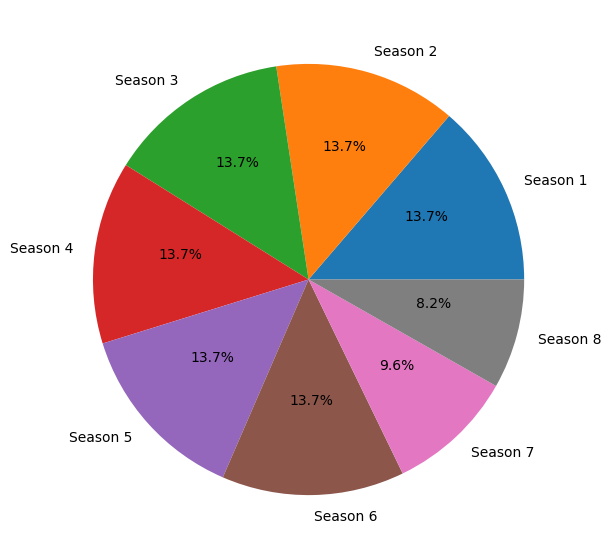

In [16]:
fig = plt.figure(figsize =(10, 7))
plt.pie(Episodes, labels = labels,autopct = lambda pct: func(pct, Episodes),)
plt.show()


### In this chart, we can see the percentage of the parts that make up the series

In [17]:
df['Rotten Tomatoes Rating (Percentage)'] = df['Rotten Tomatoes Rating (Percentage)']/10
df.head()

,Season,No. of Episode (Season),No. of Episode (Overall),Title of the Episode,Running Time (Minutes),Directed by,Written by,Original Air Date,U.S. Viewers (Millions),Music by,Cinematography by,Editing by,IMDb Rating,Rotten Tomatoes Rating (Percentage),Metacritic Ratings,Ordered,Filming Duration,Novel(s) Adapted,Synopsis
0,1,1,1,Winter Is Coming,61,Tim Van Patten,"David Benioff, D. B. Weiss",17-Apr-2011,2.22,Ramin Djawadi,Alik Sakharov,Oral Norrie Ottey,8.9,10.0,9.1,"March 2, 2010",Second half of 2010,A Game of Thrones,"North of the Seven Kingdoms of Westeros, Night..."
1,1,2,2,The Kingsroad,55,Tim Van Patten,"David Benioff, D. B. Weiss",24-Apr-2011,2.20,Ramin Djawadi,Alik Sakharov,Oral Norrie Ottey,8.6,10.0,8.9,"March 2, 2010",Second half of 2010,A Game of Thrones,"Ned, the new Hand of the King, travels to King..."
2,1,3,3,Lord Snow,57,Brian Kirk,"David Benioff, D. B. Weiss",1-May-2011,2.44,Ramin Djawadi,Marco Pontecorvo,Frances Parker,8.5,8.1,8.7,"March 2, 2010",Second half of 2010,A Game of Thrones,Ned attends the King's Small Council and learn...
3,1,4,4,"Cripples, Bastards, and Broken Things",55,Brian Kirk,Bryan Cogman,8-May-2011,2.45,Ramin Djawadi,Marco Pontecorvo,Frances Parker,8.6,10.0,9.1,"March 2, 2010",Second half of 2010,A Game of Thrones,"While returning to King's Landing, Tyrion stop..."
4,1,5,5,The Wolf and the Lion,54,Brian Kirk,"David Benioff, D. B. Weiss",15-May-2011,2.58,Ramin Djawadi,Marco Pontecorvo,Frances Parker,9.0,9.5,9.0,"March 2, 2010",Second half of 2010,A Game of Thrones,"King Robert's eunuch spy, Varys, has uncovered..."


In [18]:
df['total_score'] =df['IMDb Rating'] + df['Rotten Tomatoes Rating (Percentage)'] + df['Metacritic Ratings']

### We scale all points between 0 and 10 and And we add a new criterion called total_score to the data frame

In [19]:
df = df.rename(columns={"No. of Episode (Season)": "Episode", "Directed by": "Director" , "Written by": "Writter" })

In [35]:
dataSource = ColumnDataSource(df)

p = figure()
p.circle(source=dataSource, x='No. of Episode (Overall)', y='U.S. Viewers (Millions)', color='green')
p.line('No. of Episode (Overall)', 'total_score', source=dataSource , color = 'red') 
p.title.text = 'Popularity chart of directors episodes'
p.xaxis.axis_label = 'Episode'
p.yaxis.axis_label = 'Viewers'

h = HoverTool()
h.tooltips = [
    ('Directed by', '@Director'),
    ('Written by', '@Writter'),
    ('Season', '@Season'),
    ('Episode', '@Episode')

]
p.add_tools(h)

show(p)

### From this chart, it can be seen that as the episodes of the series go forward, it gains more fans (viewers), but another thing that is clearly evident is the sharp drop of the series from season 7 onwards, despite the fact that the series has more viewers in the seasons 7 and 8, but the downward trend does not stop, which can be the reason for the lack of motivation for the series staff, because the series has found its viewers and the upward trend of viewers has not stopped either.

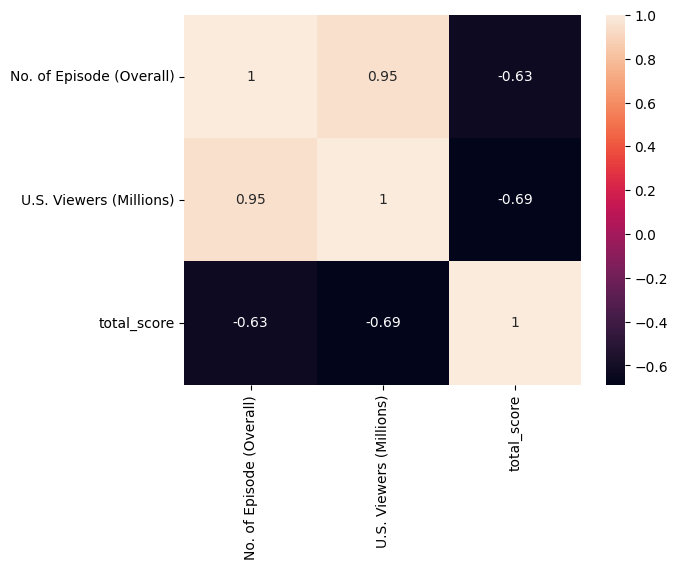

In [40]:
ax = sns.heatmap(df[['No. of Episode (Overall)' , 'U.S. Viewers (Millions)' , 'total_score']].corr(), annot=True)

# correlation coefficient
### A correlation coefficient is a statistical measure of the degree to which changes to the value of one variable predict change to the value of another. In positively correlated variables, the value increases or decreases in tandem.It can be seen that the episode number has a high correlation with the number of viewers and they have a positive correlation, and on the other hand, the total scores have a negative correlation with the viewers and the episode number, which is a confirmation of the analysis of the previous graph.

In [41]:
dataGrouped = (df.groupby('Director')['total_score' , 'IMDb Rating'].mean())
dataGrouped = dataGrouped.sort_values('total_score')

/tmp/ipykernel_2977/2939304429.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dataGrouped = (df.groupby('Director')['total_score' , 'IMDb Rating'].mean())


In [42]:
dataGrouped['counts'] = (df.groupby('Director')['Director'].count())

In [43]:
dataGrouped

,total_score,IMDb Rating,counts
Director,,,
David Benioff & D. B. Weiss,11.300000,4.000000,1
Miguel Sapochnik,23.766667,8.650000,6
Jeremy Podeswa,23.933333,8.666667,6
Daniel Sackheim,24.550000,8.800000,2
Mark Mylod,24.650000,8.600000,6
Matt Shakman,24.750000,9.200000,2
David Nutter,24.866667,8.455556,9
Jack Bender,24.950000,9.000000,2
David Petrarca,26.550000,8.600000,2


In [44]:
dataSource = ColumnDataSource(dataGrouped)
Directors = dataSource.data['Director'].tolist()

In [45]:
from bokeh.palettes import GnBu3, Category20
from bokeh.transform import factor_cmap
cm = factor_cmap(field_name='Director', palette=Category20[len(Directors)], factors=Directors)


In [46]:
dataSource = ColumnDataSource(dataGrouped)
Directors = dataSource.data['Director'].tolist()
p = figure(y_range=Directors)


p.hbar(source=dataSource, y='Director', right='total_score',left=10, height=0.5, width=4 ,color = cm)

h = HoverTool()
h.tooltips = [
    ('number of episode', '@counts')
]
p.add_tools(h)
show(p)

In [47]:
df.head()

,Season,Episode,No. of Episode (Overall),Title of the Episode,Running Time (Minutes),Director,Writter,Original Air Date,U.S. Viewers (Millions),Music by,Cinematography by,Editing by,IMDb Rating,Rotten Tomatoes Rating (Percentage),Metacritic Ratings,Ordered,Filming Duration,Novel(s) Adapted,Synopsis,total_score
0,1,1,1,Winter Is Coming,61,Tim Van Patten,"David Benioff, D. B. Weiss",17-Apr-2011,2.22,Ramin Djawadi,Alik Sakharov,Oral Norrie Ottey,8.9,10.0,9.1,"March 2, 2010",Second half of 2010,A Game of Thrones,"North of the Seven Kingdoms of Westeros, Night...",28.0
1,1,2,2,The Kingsroad,55,Tim Van Patten,"David Benioff, D. B. Weiss",24-Apr-2011,2.20,Ramin Djawadi,Alik Sakharov,Oral Norrie Ottey,8.6,10.0,8.9,"March 2, 2010",Second half of 2010,A Game of Thrones,"Ned, the new Hand of the King, travels to King...",27.5
2,1,3,3,Lord Snow,57,Brian Kirk,"David Benioff, D. B. Weiss",1-May-2011,2.44,Ramin Djawadi,Marco Pontecorvo,Frances Parker,8.5,8.1,8.7,"March 2, 2010",Second half of 2010,A Game of Thrones,Ned attends the King's Small Council and learn...,25.3
3,1,4,4,"Cripples, Bastards, and Broken Things",55,Brian Kirk,Bryan Cogman,8-May-2011,2.45,Ramin Djawadi,Marco Pontecorvo,Frances Parker,8.6,10.0,9.1,"March 2, 2010",Second half of 2010,A Game of Thrones,"While returning to King's Landing, Tyrion stop...",27.7
4,1,5,5,The Wolf and the Lion,54,Brian Kirk,"David Benioff, D. B. Weiss",15-May-2011,2.58,Ramin Djawadi,Marco Pontecorvo,Frances Parker,9.0,9.5,9.0,"March 2, 2010",Second half of 2010,A Game of Thrones,"King Robert's eunuch spy, Varys, has uncovered...",27.5


In [48]:
data = df.groupby('Season')['total_score'].mean()
data_sorted = data.sort_values()
index = data_sorted.index
values = data_sorted
index = ['Season '+str(i) for i in index]

In [49]:
data_sorted = data.sort_values()

In [50]:
index = data_sorted.index
values = data_sorted

<BarContainer object of 8 artists>

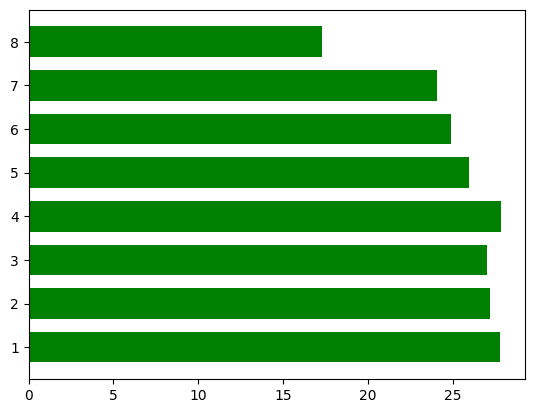

In [51]:
plt.barh(index ,values , height = 0.7 , color = 'green')